In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
X = df.values
y = diabetes.target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch: 1, Loss: 29609.0506
Epoch: 2, Loss: 29513.3111
Epoch: 3, Loss: 29420.9874
Epoch: 4, Loss: 29325.0823
Epoch: 5, Loss: 29230.1324
Epoch: 6, Loss: 29138.1161
Epoch: 7, Loss: 29047.0876
Epoch: 8, Loss: 28951.9059
Epoch: 9, Loss: 28860.3224
Epoch: 10, Loss: 28768.7459
Epoch: 11, Loss: 28676.1600
Epoch: 12, Loss: 28583.0854
Epoch: 13, Loss: 28495.4537
Epoch: 14, Loss: 28405.1920
Epoch: 15, Loss: 28318.4146
Epoch: 16, Loss: 28229.8916
Epoch: 17, Loss: 28140.5508
Epoch: 18, Loss: 28051.3249
Epoch: 19, Loss: 27963.5703
Epoch: 20, Loss: 27872.7927
Epoch: 21, Loss: 27783.4774
Epoch: 22, Loss: 27696.7038
Epoch: 23, Loss: 27615.1632
Epoch: 24, Loss: 27526.5379
Epoch: 25, Loss: 27439.5503
Epoch: 26, Loss: 27352.5216
Epoch: 27, Loss: 27268.2843
Epoch: 28, Loss: 27179.0886
Epoch: 29, Loss: 27096.7972
Epoch: 30, Loss: 27010.7317
Epoch: 31, Loss: 26927.3618
Epoch: 32, Loss: 26844.6192
Epoch: 33, Loss: 26764.6562
Epoch: 34, Loss: 26684.5643
Epoch: 35, Loss: 26600.8535
Epoch: 36, Loss: 26518.3764
E

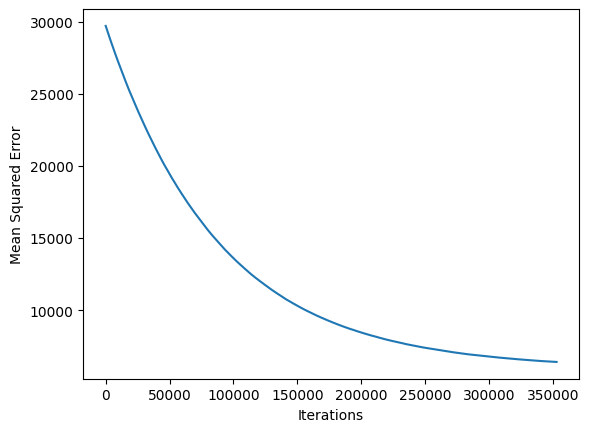

In [30]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
X = df.values
y = diabetes.target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class SGD:
    def __init__(self, lr=0.002, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weight = None
        self.bias = None
        
    def mse(self, x, y):
        n_samples = x.shape[0]
        y_pred = x @ self.weight + self.bias
        mse = (1/n_samples) * np.sum((y_pred - y)**2)
        return mse
    
    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weight = np.random.rand(n_features, 1)
        self.bias = 0
        cost_list = []
        for epoch in range(self.epochs):
            for i in range(n_samples):
                idx = np.random.randint(n_samples)
                xi = x[idx:idx+1]
                yi = y[idx:idx+1]
                y_pred = xi @ self.weight + self.bias
                dw = (1/n_samples) * xi.T @ (y_pred - yi)
                db = (1/n_samples) * np.sum(y_pred - yi)
                self.weight -= self.lr * dw
                self.bias -= self.lr * db
                loss = self.mse(x, y)
                cost_list.append(loss)
            print('Epoch: %d, Loss: %.4f' % (epoch+1, loss))
        plt.plot(cost_list)
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.show()
        
    def predict(self, x):
        y_pred = x @ self.weight + self.bias
        return y_pred
        
sdg = SGD(lr=0.002, epochs=1000)
sdg.fit(X_train, y_train)
